<a href="https://colab.research.google.com/github/ilknurs/machine-learning-algorithms/blob/main/Detection_of_Dementia_Disease_Using_OASIS_Datase_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Veri seti yükleniyor.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets


from google.colab import files
uploaded = files.upload()

Saving oasis_longitudinal.csv to oasis_longitudinal.csv


Veri kümesindeki öznitelikler tanımlanıyor.

---



In [ ]:
import pandas as pd
import io

data_long = pd.read_csv(io.StringIO(uploaded['oasis_longitudinal.csv'].decode('utf-8')))
data_long

data_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
data_long.describe(include=[np.number])

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
data_long.describe(include=[np.object])

,Subject ID,MRI ID,Group,M/F,Hand
count,373,373,373,373,373
unique,150,373,3,2,1
top,OAS2_0070,OAS2_0001_MR1,Nondemented,F,R
freq,5,1,190,213,373


El yalnızca sağlak olduğundan çıkarıldı. sub Id ve Mrı Id analizde kullanılmadığından çıkarıldılar.

In [ ]:
data_long = data_long.drop(['Subject ID','MRI ID','Hand'],axis=1)

data_long.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
data_long.isna().sum()

Group        0
Visit        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

daha iyi anlamak için her sütundaki eksik değerlerin yüzdesini kontrol ediyorum

In [ ]:
round(data_long.isnull().sum()/len(data_long.index), 2)*100

Group       0.0
Visit       0.0
MR Delay    0.0
M/F         0.0
Age         0.0
EDUC        0.0
SES         5.0
MMSE        1.0
CDR         0.0
eTIV        0.0
nWBV        0.0
ASF         0.0
dtype: float64

SES ve MMSE'de eksik değerleri atfetmeliyiz. SES sütunu analiz ediliyor.

In [ ]:
def univariate_mul(var):
    fig = plt.figure(figsize=(16,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(212)
    data_long[var].plot(kind='hist',ax=ax1, grid=True)
    ax1.set_title('Histogram of '+var, fontsize=14)
    
    ax2=sns.distplot(data_long[[var]],hist=False)
    ax2.set_title('Distribution of '+ var)
    plt.show()

eksik değerler yerine hangi değeri yükleyebileceğimize karar vermek için SES dağılımını görelim.

SES tamsayı türünde değerlere sahip olduğundan, ortalamanın kayan nokta değerini tahmin edemeyiz, ancak hem medyan hem de ortalama çok yakın değerlere sahip olduğu için medyanı yerine koyabiliriz ve bu durumda medyan SES'in en temsili değeridir.

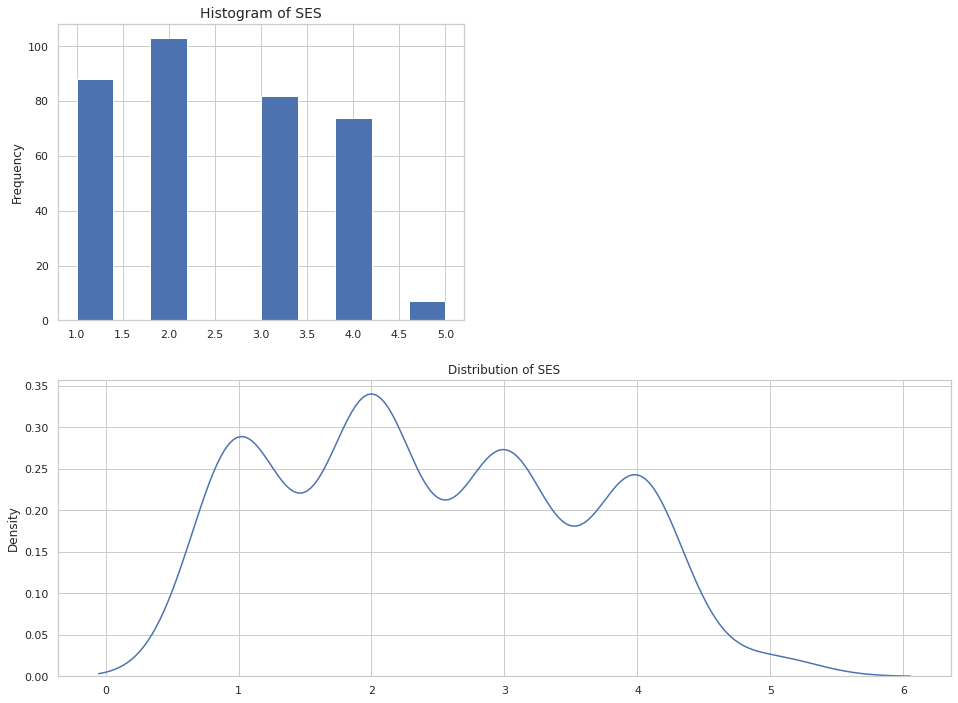

count    354.000000
mean       2.460452
std        1.134005
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
univariate_mul('SES')
data_long['SES'].describe()

In [ ]:
data_long['SES'].fillna((data_long['SES'].median()), inplace=True)

aynı işlemler MMSE için yapılıyor.

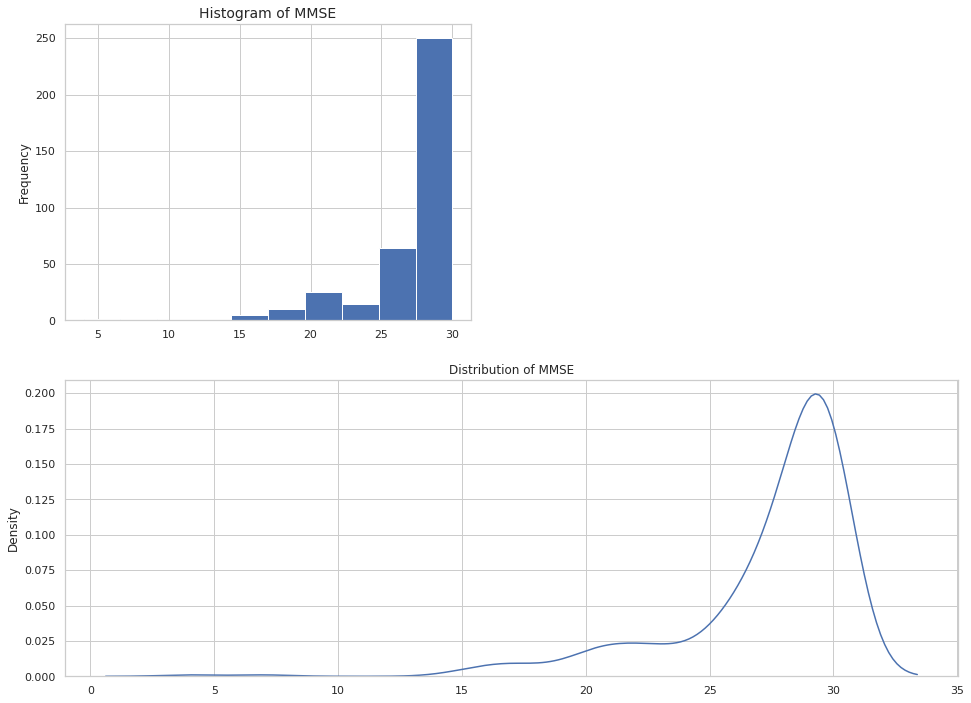

count    371.000000
mean      27.342318
std        3.683244
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

In [ ]:
univariate_mul('MMSE')
data_long['MMSE'].describe()

In [ ]:
data_long['MMSE'].fillna((data_long['MMSE'].median()), inplace=True)

Şimdi, her sütundaki eksik değerlerin yüzdesini kontrol edelim

In [ ]:
round(data_long.isnull().sum()/len(data_long.index), 2)*100

Group       0.0
Visit       0.0
MR Delay    0.0
M/F         0.0
Age         0.0
EDUC        0.0
SES         0.0
MMSE        0.0
CDR         0.0
eTIV        0.0
nWBV        0.0
ASF         0.0
dtype: float64

Harika!! yani şimdi kayıp değer yok. Tek Değişkenli Analize geçelim

In [ ]:
def plot_piechart(var):
  plt.figure(figsize=(14,7))
  plt.subplot(121)
  label_list = data_long[var].unique().tolist()
  data_long[var].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=label_list,
  wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)
  plt.title("Distribution of "+ var +"  variable")

  plt.subplot(122)
  ax = data_long[var].value_counts().plot(kind="barh")

  for i,j in enumerate(data_long[var].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

  plt.title("Count of "+ var +" cases")
  plt.show()

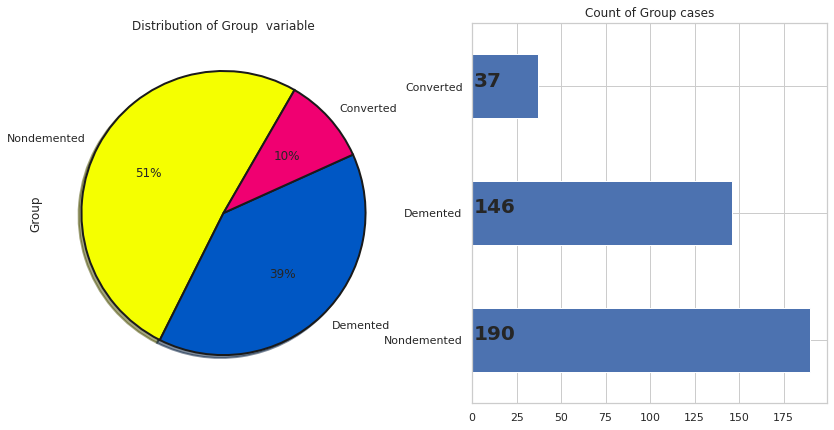

In [ ]:
plot_piechart('Group')

In [ ]:
data_long['CDR'].describe()

count    373.000000
mean       0.290885
std        0.374557
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        2.000000
Name: CDR, dtype: float64

In [ ]:
# Plotting CDR with other variable
def univariate_percent_plot(cat):
    fig = plt.figure(figsize=(18,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    
    result = data_long.groupby(cat).apply (lambda group: (group.CDR == 'Normal').sum() / float(group.CDR.count())
         ).to_frame('Normal')
    result['Dementia'] = 1 -result.Normal
    result.plot(kind='bar', stacked = True,colormap=cmap1, ax=ax1, grid=True)
    ax1.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax1.set_ylabel('% Dementia status (Normal vs Dementia)')
    ax1.legend(loc="lower right")
    group_by_stat = data_long.groupby([cat, 'CDR']).size()
    group_by_stat.unstack().plot(kind='bar', stacked=True,ax=ax2,grid=True)
    ax2.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax2.set_ylabel('Number of Cases')
    plt.show()



# Categorizing feature CDR
def cat_CDR(n):
    if n == 0:
        return 'Normal'
    
    else:                                         # As we have no cases of sever dementia CDR score=3
        return 'Dementia'

data_long['CDR'] = data_long['CDR'].apply(lambda x: cat_CDR(x))

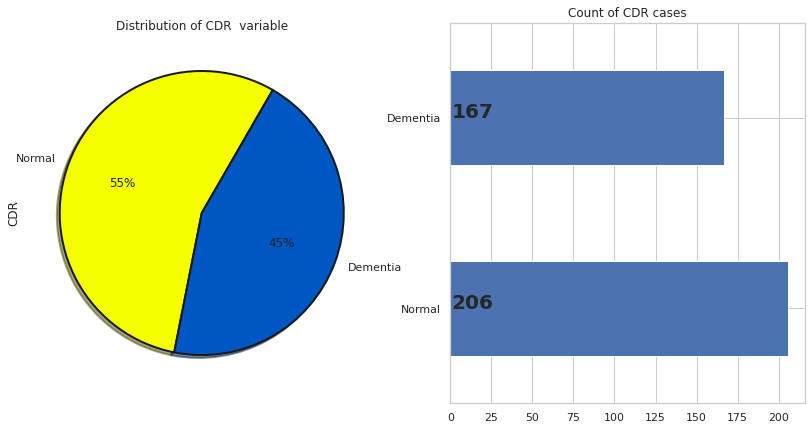

In [ ]:
plot_piechart('CDR')

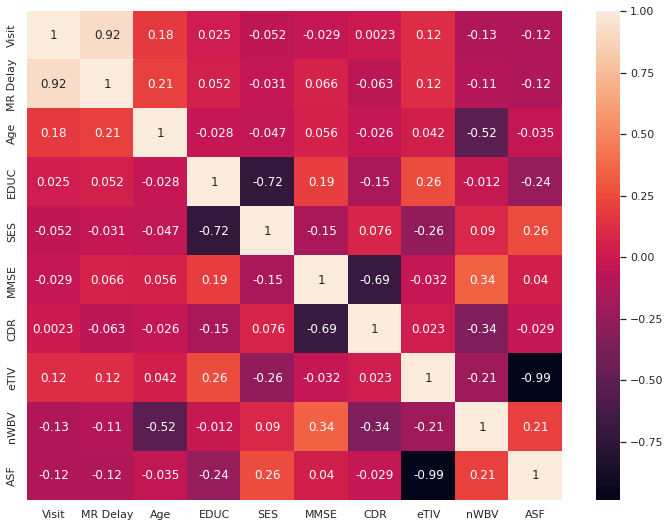

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

cor = data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(cor, xticklabels=cor.columns.values,yticklabels=cor.columns.values, annot=True)

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport


In [ ]:
# Hata alıyorum 

#import pandas_profiling as pp
#pp.ProfileReport(data)

In [ ]:
data.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

SimpleImputer kullanarak sütunları atama. "SES" sütunlarındaki eksik değerleri en çok oluşan veri elemanı ile dolduruyoruz. Benzer şekilde "MMSE" sütunundaki eksik değerleri o sütunun medyanı ile dolduruyoruz.

In [ ]:
from sklearn.impute  import SimpleImputer
imputer = SimpleImputer ( missing_values = np.nan,strategy='most_frequent')

imputer.fit(data_long[['SES']])
data_long[['SES']] = imputer.fit_transform(data_long[['SES']])

# We perform it with the median
imputer = SimpleImputer ( missing_values = np.nan,strategy='median')

imputer.fit(data_long[['MMSE']])
data_long[['MMSE']] = imputer.fit_transform(data_long[['MMSE']])

In [ ]:
data_long

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,Normal,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,Normal,2004,0.681,0.876
2,Demented,1,0,M,75,12,2.0,23.0,Dementia,1678,0.736,1.046
3,Demented,2,560,M,76,12,2.0,28.0,Dementia,1738,0.713,1.010
4,Demented,3,1895,M,80,12,2.0,22.0,Dementia,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,82,16,1.0,28.0,Dementia,1693,0.694,1.037
369,Demented,3,2297,M,86,16,1.0,26.0,Dementia,1688,0.675,1.040
370,Nondemented,1,0,F,61,13,2.0,30.0,Normal,1319,0.801,1.331
371,Nondemented,2,763,F,63,13,2.0,30.0,Normal,1327,0.796,1.323


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_long['CDR'] = le.fit_transform(data_long['CDR'].values)

In [ ]:
data = pd.get_dummies(data_long)

<BarContainer object of 2 artists>

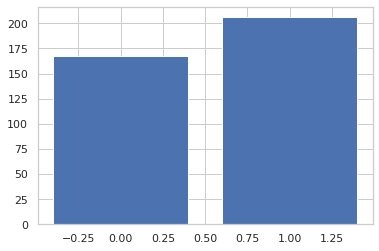

In [ ]:
plt.bar(data['CDR'].unique(),data['CDR'].value_counts())

In [ ]:
data = data.drop(data[data['CDR']==3].index)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Visit              373 non-null    int64  
 1   MR Delay           373 non-null    int64  
 2   Age                373 non-null    int64  
 3   EDUC               373 non-null    int64  
 4   SES                373 non-null    float64
 5   MMSE               373 non-null    float64
 6   CDR                373 non-null    int64  
 7   eTIV               373 non-null    int64  
 8   nWBV               373 non-null    float64
 9   ASF                373 non-null    float64
 10  Group_Converted    373 non-null    uint8  
 11  Group_Demented     373 non-null    uint8  
 12  Group_Nondemented  373 non-null    uint8  
 13  M/F_F              373 non-null    uint8  
 14  M/F_M              373 non-null    uint8  
dtypes: float64(4), int64(6), uint8(5)
memory usage: 33.9 KB


In [ ]:
y = data.pop('CDR')
x = data

In [ ]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

Veri kümesi eğitim ve test olarak ayrıldı.

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1,test_size=0.3)

SVC(kernel='linear')
0.9866666666666667
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.98      1.00      0.99        43

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



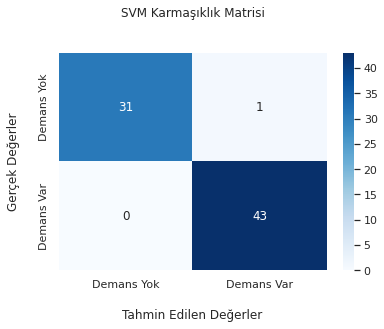

In [ ]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 5,test_size=0.2)

svm_model = SVC(kernel="linear").fit(X_train,y_train)

print(svm_model)

y_pred = svm_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('SVM Karmaşıklık Matrisi\n\n');
ax.set_xlabel('\nTahmin Edilen Değerler')
ax.set_ylabel('Gerçek Değerler\n ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Demans Yok','Demans Var'])
ax.yaxis.set_ticklabels(['Demans Yok','Demans Var'])

## Display the visualization of the Confusion Matrix.
plt.show()


Doğruluk  :   0.9466666666666667


              precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       1.00      0.92      0.96        49

    accuracy                           0.95        75
   macro avg       0.93      0.96      0.94        75
weighted avg       0.95      0.95      0.95        75



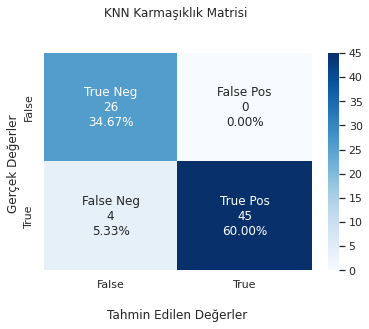

In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1,test_size=0.2)

knn_model = KNeighborsClassifier().fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')



y_pred = knn_model.predict(X_test)

y_pred


print("Doğruluk  :  ",accuracy_score(y_test, y_pred))
print("\n")

print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('KNN Karmaşıklık Matrisi \n\n');
ax.set_xlabel('\nTahmin Edilen Değerler')
ax.set_ylabel('Gerçek Değerler ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

GradientBoostingClassifier()
Accuracy:  0.96
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       0.98      0.96      0.97        49

    accuracy                           0.96        75
   macro avg       0.95      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

Fitting 10 folds for each of 1 candidates, totalling 10 fits


{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300}

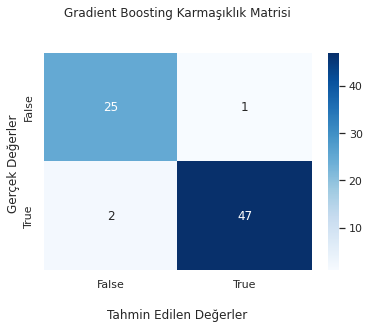

In [ ]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
print(gbm_model)

y_pred = gbm_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))


print(classification_report(y_test, y_pred))


cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Gradient Boosting Karmaşıklık Matrisi\n\n');
ax.set_xlabel('\nTahmin Edilen Değerler')
ax.set_ylabel('Gerçek Değerler ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#%% model tunning

gbm = GradientBoostingClassifier()
gbm_params = {"learning_rate": [0.01],
              "n_estimators": [300],
              "max_depth": [2]}
gbm_cv_model= GridSearchCV(gbm, gbm_params,
                            cv=10,
                            n_jobs=-1,
                            verbose=2).fit(X_train, y_train)

#%% En iyi Sonuç
gbm_cv_model.best_params_


DecisionTreeClassifier(criterion='entropy', random_state=0)
Doğruluk:  0.96
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       0.98      0.96      0.97        49

    accuracy                           0.96        75
   macro avg       0.95      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



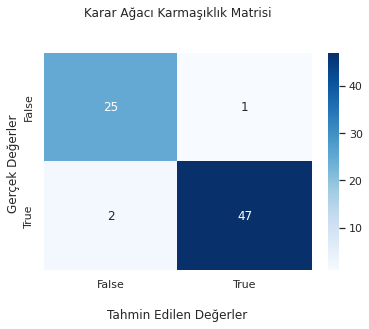

In [ ]:
# Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0) 
dt_model.fit(X_train, y_train)
print(dt_model)

y_pred = dt_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))


print(classification_report(y_test, y_pred))


cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Karar Ağacı Karmaşıklık Matrisi\n\n');
ax.set_xlabel('\nTahmin Edilen Değerler')
ax.set_ylabel('Gerçek Değerler ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


Accuracy:  0.9333333333333333
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.90      0.95        49

    accuracy                           0.93        75
   macro avg       0.92      0.95      0.93        75
weighted avg       0.94      0.93      0.93        75



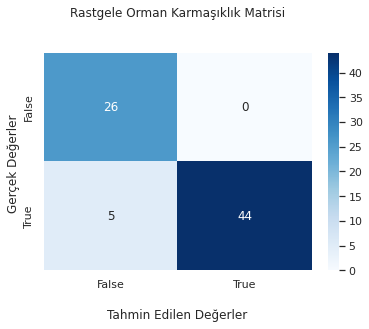

In [ ]:
# Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier  

rf_model= RandomForestClassifier(n_estimators= 10, criterion="entropy") 
rf_model.fit(X_train, y_train)  

y_pred = rf_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))


print(classification_report(y_test, y_pred))


cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Rastgele Orman Karmaşıklık Matrisi\n\n');
ax.set_xlabel('\nTahmin Edilen Değerler')
ax.set_ylabel('Gerçek Değerler ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


Accuracy:  0.96
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.94      0.97        49

    accuracy                           0.96        75
   macro avg       0.95      0.97      0.96        75
weighted avg       0.96      0.96      0.96        75



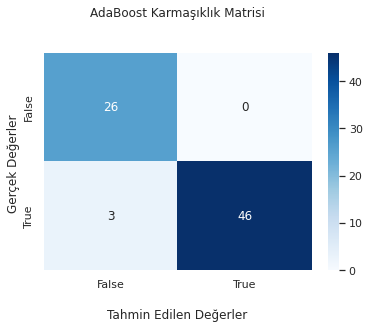

In [ ]:
# Adaboost Agorithm

from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
ab_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = ab_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))


print(classification_report(y_test, y_pred))


cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('AdaBoost Karmaşıklık Matrisi\n\n');
ax.set_xlabel('\nTahmin Edilen Değerler')
ax.set_ylabel('Gerçek Değerler ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


Metrikler tanımlandı.

software yer işaretini kontrol ett


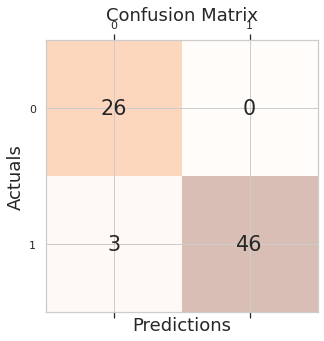

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
#
# Standardize the data set
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Fit the SVC model
#
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = svc.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap='Oranges', alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print("Precision Score : %.3f " % precision_score(y_test, y_pred, 
                                         #  pos_label='positive',
                                           average='micro'))
print("Recall Score : %.3f" % recall_score(y_test, y_pred, 
                                          # pos_label='positive',
                                           average='micro'))
print("Accuracy Score : %.3f" % accuracy_score(y_test, y_pred))


print("F1 Score : %.3f" % f1_score(y_test, y_pred, 
                                          # pos_label='positive',
                                           average='micro'))


Precision Score : 0.960 
Recall Score : 0.960
Accuracy Score : 0.960
F1 Score : 0.960
